<strong>
    <font color="#0E1117">
        Author: lprtk
    </font>
</strong>

<br/>
<br/>

<Center>
    <h1 style="font-family: Arial">
        <font color="#0E1117">
            Hybrid learning prototype
        </font>
    </h1>
    <br/>
    <h2>
        <font color="#0E1117">
            Example of use
        </font>
    </h2>
</Center>

------------------------------------------------------------------------------------------------------------------------------- 

<div style="margin: 10px;">
    <h2 style="font-family: Arial">
        <font color="#0E1117">
            Libraries import
        </font>
    </h2>
</div>

In [1]:
from datetime import datetime
from joining_class import JoiningClassifier, JoiningRegressor
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

------------------------------------------------------------------------------------------------------------------------------- 

<div style="margin: 10px;">
    <h2 style="font-family: Arial">
        <font color="#0E1117">
            Data import
        </font>
    </h2>
</div>

In [2]:
df = pd.DataFrame(
    {
        "Array1": list(np.random.rand(50)),
        "Array2": list(np.random.rand(50)),
        "Array3": [
            0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
            1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
            1, 0, 1, 0, 1, 1, 0, 0, 0, 0
        ],
        "Array4": [
            0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
            0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
            1, 1, 1, 1, 0, 1, 0, 1, 0, 0
        ],
        "Date": pd.date_range(start=datetime.today(), periods=50).to_list()
    }
)

df.set_index(keys="Date", drop=False, inplace=True)

In [3]:
print(df.head(3))

                              Array1    Array2  Array3  Array4  \
Date                                                             
2022-07-01 15:24:51.729021  0.242800  0.990285       0       0   
2022-07-02 15:24:51.729021  0.927933  0.603402       1       0   
2022-07-03 15:24:51.729021  0.395663  0.547644       1       1   

                                                 Date  
Date                                                   
2022-07-01 15:24:51.729021 2022-07-01 15:24:51.729021  
2022-07-02 15:24:51.729021 2022-07-02 15:24:51.729021  
2022-07-03 15:24:51.729021 2022-07-03 15:24:51.729021  


------------------------------------------------------------------------------------------------------------------------------- 

<div style="margin: 10px;">
    <h2 style="font-family: Arial">
        <font color="#0E1117">
            Data visualization
        </font>
    </h2>
</div>

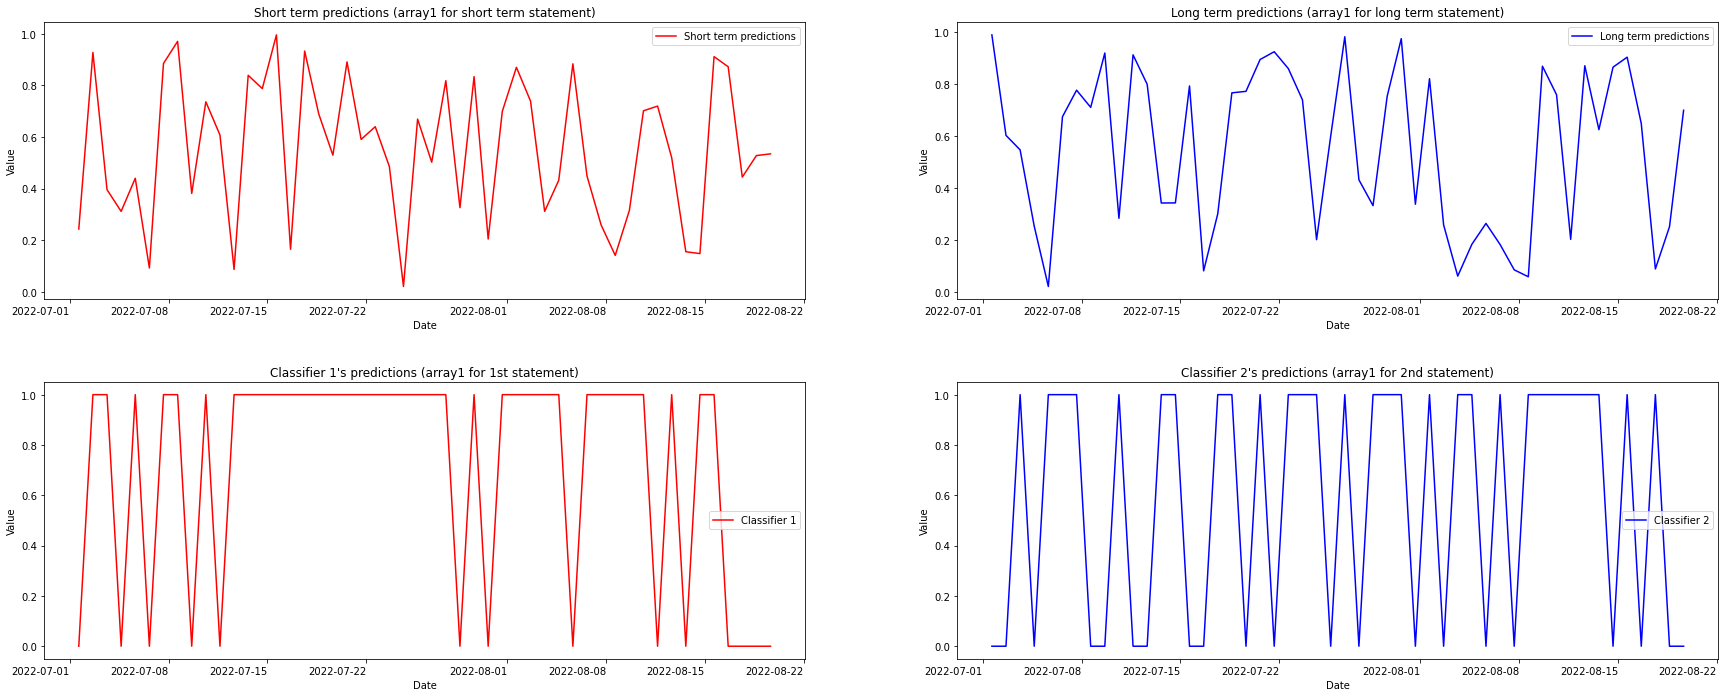

In [4]:
fig = plt.figure(figsize=(30, 13))

plt.subplot(2, 2, 1)
df["Array1"].plot(color="red", label="Short term predictions")
plt.title("Short term predictions (array1 for short term statement)")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend(loc="best")
plt.xticks(rotation=0)

plt.subplot(2, 2, 2)
df["Array2"].plot(color="blue", label="Long term predictions")
plt.title("Long term predictions (array1 for long term statement)")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend(loc="best")
plt.xticks(rotation=0)

plt.subplot(2, 2, 3)
df["Array3"].plot(color="red", label="Classifier 1")
plt.title("Classifier 1's predictions (array1 for 1st statement)")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend(loc="best")
plt.xticks(rotation=0)

plt.subplot(2, 2, 4)
df["Array4"].plot(color="blue", label="Classifier 2")
plt.title("Classifier 2's predictions (array1 for 2nd statement)")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend(loc="best")
plt.xticks(rotation=0)
plt.subplots_adjust(hspace=0.3)
plt.show()

------------------------------------------------------------------------------------------------------------------------------- 

<div style="margin: 10px;">
    <h2 style="font-family: Arial">
        <font color="#0E1117">
            Functionalities
        </font>
    </h2>
</div>

In [5]:
df.reset_index(drop=True, inplace=True)

<div style="margin: 10px;">
    <h2 style="font-family: Arial">
        <font color="#0E1117">
            1. Use a regression model
        </font>
    </h2>
</div>

In [6]:
model = JoiningRegressor(
    y_pred_1=df["Array1"],
    y_pred_2=df["Array2"],
    exponential_coeff=0.9
)

In [7]:
model.fit()

In [8]:
model.get_predictions()

array([0.2427998 , 0.89548003, 0.4245394 , 0.29562522, 0.29602392,
       0.33066387, 0.8347596 , 0.83553799, 0.68829356, 0.45942863,
       0.80684638, 0.57607544, 0.48312487, 0.45641285, 0.84005512,
       0.09877297, 0.41839294, 0.75409605, 0.73638427, 0.89497886,
       0.88476936, 0.83641506, 0.71514351, 0.18561002, 0.60558364,
       0.94862517, 0.45729399, 0.3323977 , 0.75774117, 0.93957462,
       0.35359845, 0.82344116, 0.27512709, 0.06929353, 0.19082318,
       0.2798855 , 0.18926444, 0.08921113, 0.06046324, 0.86063816,
       0.75893496, 0.21002081, 0.86726457, 0.62033172, 0.85905189,
       0.90455497, 0.65071792, 0.0915766 , 0.25336789, 0.69908548])

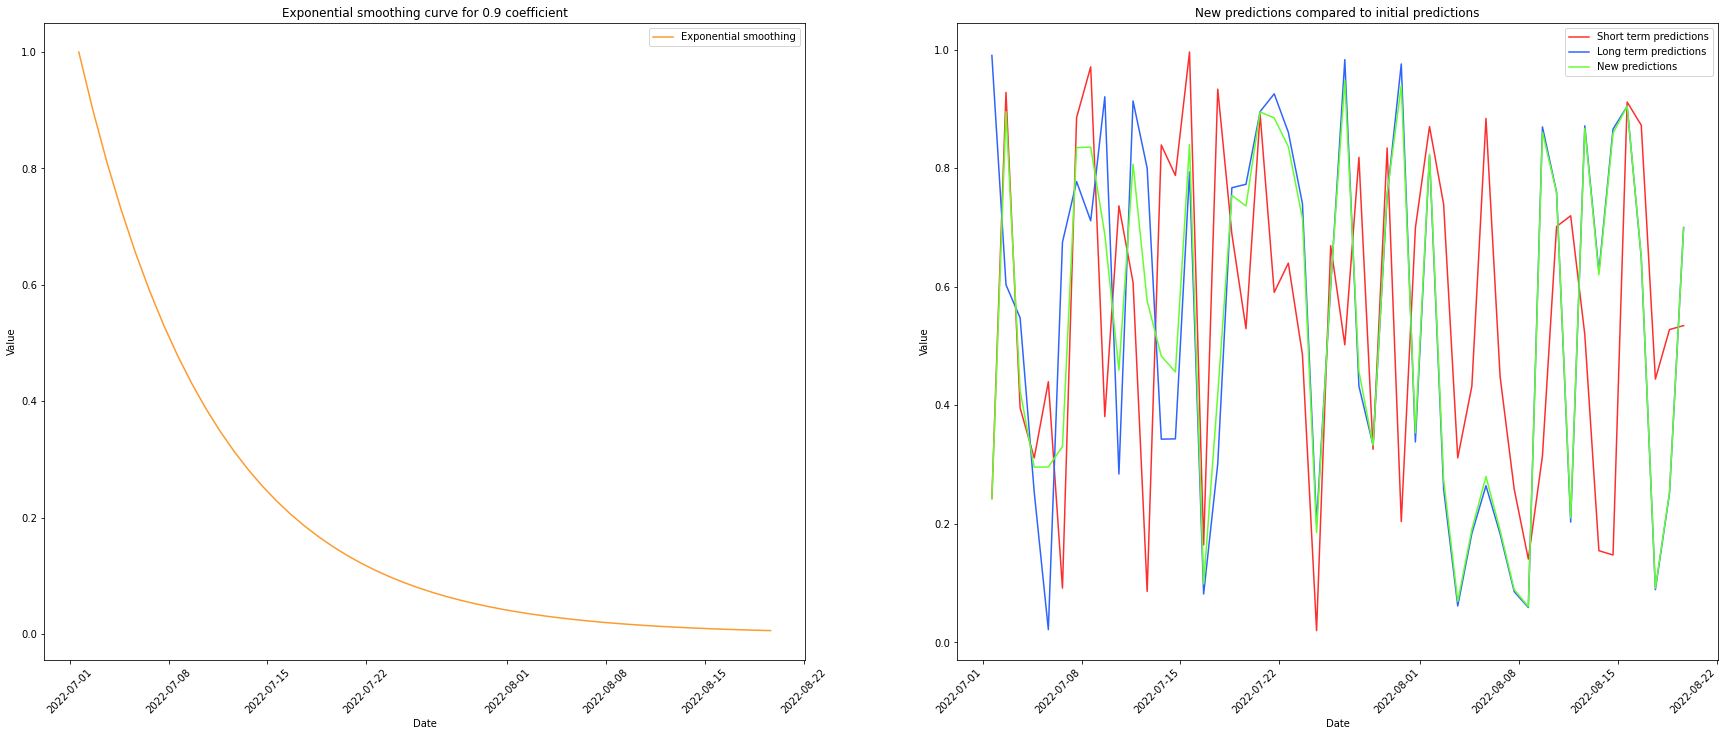

In [9]:
model.get_plot(
    date=df["Date"],
    figsize=(30, 13),
    colors=["#FE9A2E", "#FE2E2E", "#2E64FE", "#64FE2E"],
    title="New predictions compared to initial predictions",
    xlabel="Date",
    ylabel="Value",
    label1="Short term predictions",
    label2="Long term predictions",
    xticks_rotation=45
)

<div style="margin: 10px;">
    <h2 style="font-family: Arial">
        <font color="#0E1117">
            2. Use a classification model
        </font>
    </h2>
</div>

In [10]:
model = JoiningClassifier(
    y_pred_1=df["Array3"],
    y_pred_2=df["Array4"],
    exponential_coeff=0.9,
    threshold=0.5
)

In [11]:
model.fit()

In [12]:
model.get_predictions()

array([0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0.])

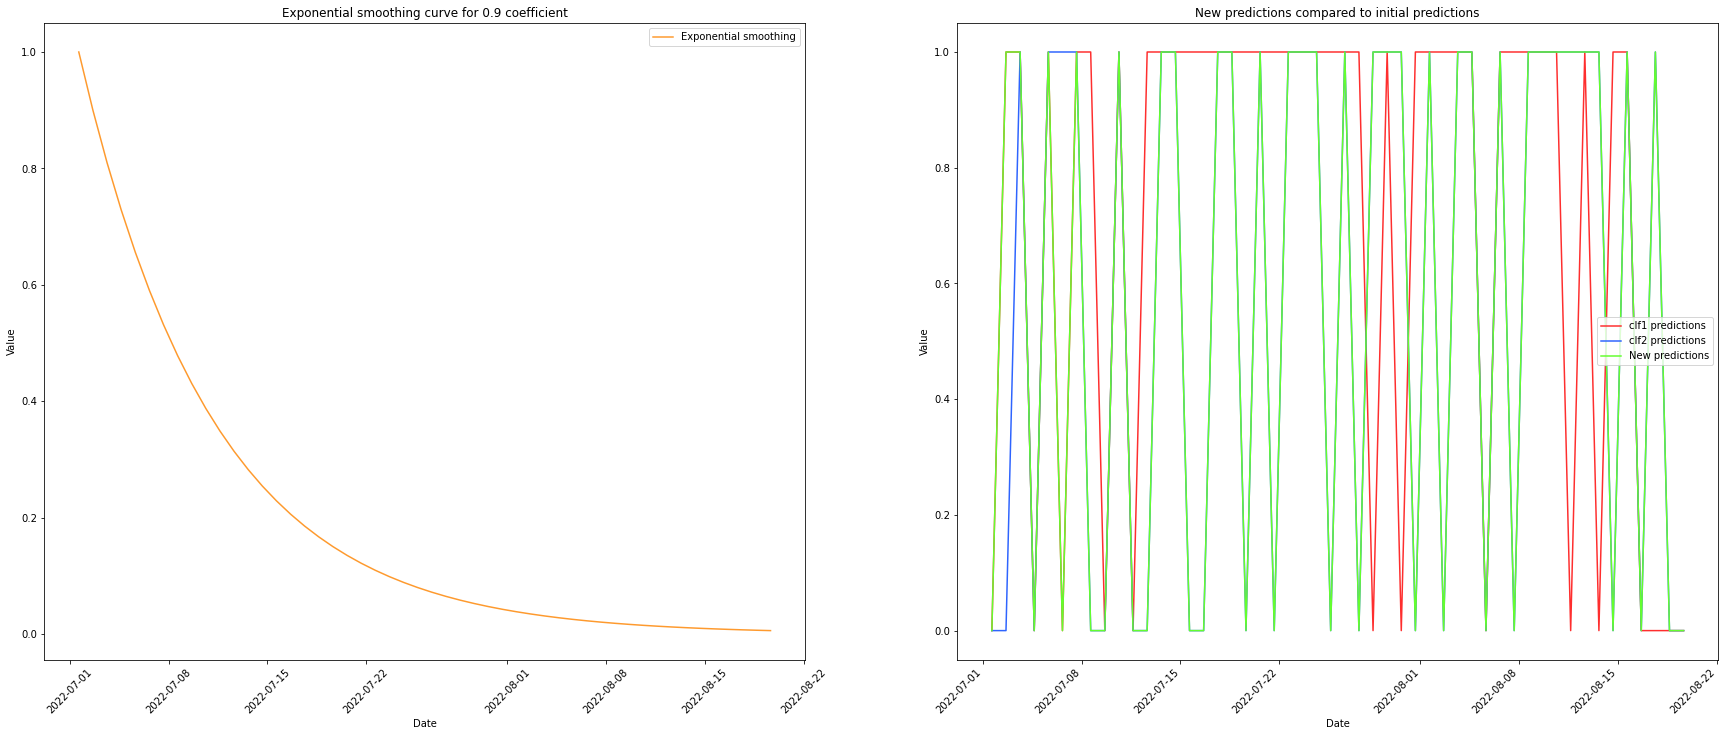

In [13]:
model.get_plot(
    date=df["Date"],
    figsize=(30, 13),
    colors=["#FE9A2E", "#FE2E2E", "#2E64FE", "#64FE2E"],
    title="New predictions compared to initial predictions",
    xlabel="Date",
    ylabel="Value",
    label1="clf1 predictions",
    label2="clf2 predictions",
    xticks_rotation=45
)